In [1]:
import numpy as np 
import pandas as pd
import os
import matplotlib.pyplot as plt
from sklearn.model_selection import train_test_split
from keras_preprocessing.image import ImageDataGenerator
import glob
from tensorflow.keras import layers
from tensorflow.keras import models
from tensorflow.keras.applications import VGG19
from tensorflow.keras.applications import ResNet50
from tensorflow.keras import regularizers
from tensorflow.keras.utils import plot_model
from tensorflow.keras import backend as K

#### Data Processing

In [2]:
# Load and review data labels
df_raw = pd.read_csv('./train_labels.csv')
df_raw.head()

,id,label
0,f38a6374c348f90b587e046aac6079959adf3835,0
1,c18f2d887b7ae4f6742ee445113fa1aef383ed77,1
2,755db6279dae599ebb4d39a9123cce439965282d,0
3,bc3f0c64fb968ff4a8bd33af6971ecae77c75e08,0
4,068aba587a4950175d04c680d38943fd488d6a9d,0


In [3]:
filenames = pd.DataFrame([os.path.basename(x) for x in glob.glob('t6/*.tif')], columns=["id"])
filenames["id"] = filenames["id"].map(lambda x: str(x)[:-4])

In [4]:
df = filenames.merge(df_raw, how = "left", on="id")

In [5]:
# Check the shape of the images
img = plt.imread("./t6/"+df.iloc[0]['id']+'.tif')
img.shape

(96, 96, 3)

In [6]:
# Check the number of images of each label
print('Number of label 1 images: ' + str(len(df[df['label'] ==1])))
print('Number of label 0 images: ' + str(len(df[df['label'] ==0])))

Number of label 1 images: 12235
Number of label 0 images: 17765


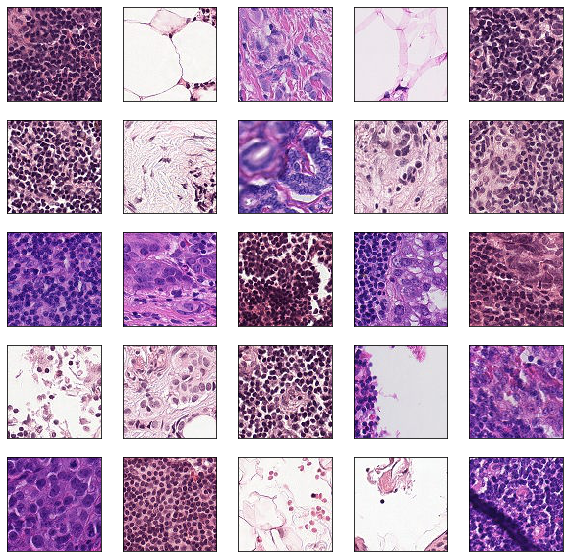

In [7]:
# Load 25 image samples
path = "t6/"
plt.figure(figsize=(10, 10))
for i in range(25):
    ax = plt.subplot(5, 5, i+1)
    plt.imshow(plt.imread(path+df.iloc[i]['id']+'.tif'))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

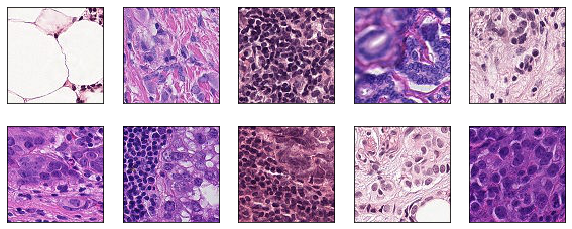

In [8]:
# Load 10 image samples with label 1
plt.figure(figsize=(10, 4))
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(plt.imread(path+df[df['label'] ==1].iloc[i]['id']+'.tif'))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

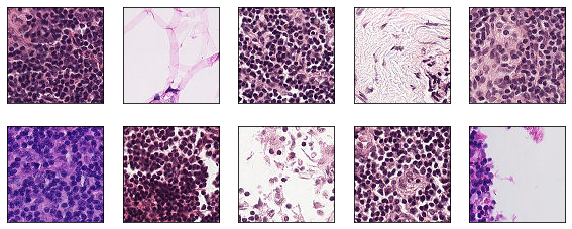

In [9]:
# Load 10 image samples with label 0
plt.figure(figsize=(10, 4))
for i in range(10):
    ax = plt.subplot(2, 5, i+1)
    plt.imshow(plt.imread(path+df[df['label'] ==0].iloc[i]['id']+'.tif'))
    ax.get_xaxis().set_visible(False)
    ax.get_yaxis().set_visible(False)
plt.show()

In [10]:
# Create train and test data set
train_df, test_df = train_test_split(df, test_size=0.2)

x_train = []
for file in train_df["id"]:
    img = plt.imread(path +'{}'.format(file)+'.tif')
    x_train.append(img)
x_train = np.array(x_train)
y_train =  train_df["label"]

x_test = []
for file in test_df["id"]:
    img = plt.imread(path +'{}'.format(file)+'.tif')
    x_test.append(img)
x_test = np.array(x_test)
y_test =  test_df["label"]

#### Build a CNN model

In [11]:
# Build model
model = models.Sequential()
model.add(layers.Conv2D(32, (3, 3), padding = 'same', activation = 'relu', input_shape = (96, 96, 3)))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(32, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(32, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'relu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(64, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(64, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'elu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Conv2D(128, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'elu'))
model.add(layers.BatchNormalization())
model.add(layers.Conv2D(128, (3, 3), padding = 'same', kernel_regularizer=regularizers.l2(0.001), activation = 'elu'))
model.add(layers.Dropout(0.1))
model.add(layers.MaxPooling2D((2, 2)))

model.add(layers.Flatten())
model.add(layers.Dense(128, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.BatchNormalization())
model.add(layers.Dense(64, kernel_regularizer=regularizers.l2(0.001), activation='relu'))
model.add(layers.Dropout(0.1))
model.add(layers.Dense(1, activation = 'sigmoid'))
model.summary()

Model: "sequential"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
conv2d (Conv2D)              (None, 96, 96, 32)        896       
_________________________________________________________________
batch_normalization_v2 (Batc (None, 96, 96, 32)        128       
_________________________________________________________________
conv2d_1 (Conv2D)            (None, 96, 96, 32)        9248      
_________________________________________________________________
dropout (Dropout)            (None, 96, 96, 32)        0         
_________________________________________________________________
max_pooling2d (MaxPooling2D) (None, 48, 48, 32)        0         
_________________________________________________________________
conv2d_2 (Conv2D)            (None, 48, 48, 32)        9248      
_________________________________________________________________
batch_normalization_v2_1 (Ba (None, 48, 48, 32)        1

In [12]:
# Train model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])
history = model.fit(
                x = x_train,
                y = y_train,
                epochs=30,
                validation_split=0.1)

Train on 21600 samples, validate on 2400 samples
Epoch 1/30
21600/21600 [==============================] - 20s 913us/sample - loss: 1.0464 - accuracy: 0.8121 - val_loss: 1.2271 - val_accuracy: 0.6475
Epoch 2/30
21600/21600 [==============================] - 12s 553us/sample - loss: 0.6117 - accuracy: 0.8448 - val_loss: 0.6688 - val_accuracy: 0.7775
Epoch 3/30
21600/21600 [==============================] - 12s 553us/sample - loss: 0.4600 - accuracy: 0.8564 - val_loss: 0.4624 - val_accuracy: 0.8542
Epoch 4/30
21600/21600 [==============================] - 12s 552us/sample - loss: 0.4119 - accuracy: 0.8637 - val_loss: 0.4013 - val_accuracy: 0.8717
Epoch 5/30
21600/21600 [==============================] - 12s 552us/sample - loss: 0.3809 - accuracy: 0.8722 - val_loss: 0.5252 - val_accuracy: 0.8562
Epoch 6/30
21600/21600 [==============================] - 12s 550us/sample - loss: 0.3666 - accuracy: 0.8748 - val_loss: 0.5039 - val_accuracy: 0.8687
Epoch 7/30
21600/21600 [=====================

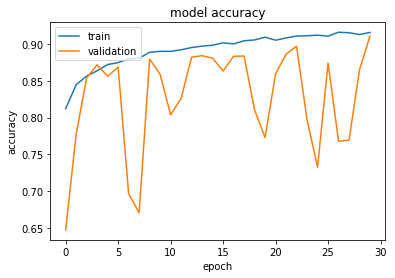

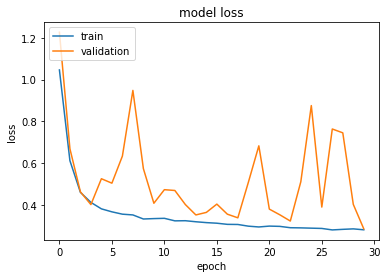

In [13]:
# Visualize training results
plt.plot(history.history['accuracy'])
plt.plot(history.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [14]:
# Check testing accuracy
results = model.evaluate(x_test, y_test)
print('The testing accuracy is: ' + str(results[1]))

6000/6000 [==============================] - 1s 172us/sample - loss: 0.2934 - accuracy: 0.9085
The testing accuracy is: 0.9085


#### Visualizing what the CNN learns 
Based on https://nbviewer.jupyter.org/github/fchollet/deep-learning-with-python-notebooks/blob/master/5.4-visualizing-what-convnets-learn.ipynb

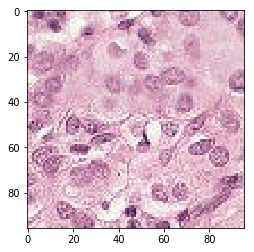

In [15]:
# Load a random image
img = plt.imread(path+'34355428388f2809571399feb6fd1be10462a71b'+'.tif')
img = np.expand_dims(img, axis=0)
plt.imshow(img[0])

In [16]:
# Extracts the outputs of the top 10 layers
layer_outputs = [layer.output for layer in model.layers[:10]]
activation_model = models.Model(inputs=model.input, outputs=layer_outputs)

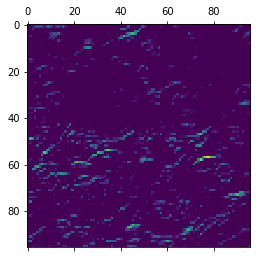

In [33]:
# Visualize the second channel of the first convolution layer
activations = activation_model.predict(img)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 1], cmap='viridis')
plt.show()

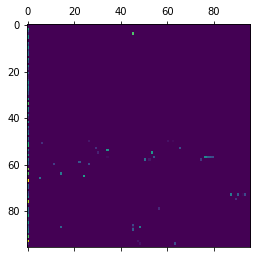

In [35]:
# Visualize the fifth channel of the first convolution layer
activations = activation_model.predict(img)
first_layer_activation = activations[0]
plt.matshow(first_layer_activation[0, :, :, 4], cmap='viridis')
plt.show()

/gpfs/data/data2040/tf2gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: invalid value encountered in true_divide
/gpfs/data/data2040/tf2gpu2/lib/python3.6/site-packages/ipykernel_launcher.py:28: RuntimeWarning: divide by zero encountered in true_divide


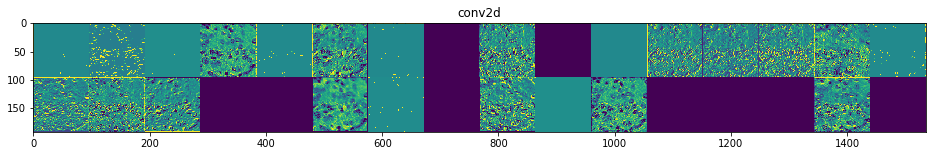

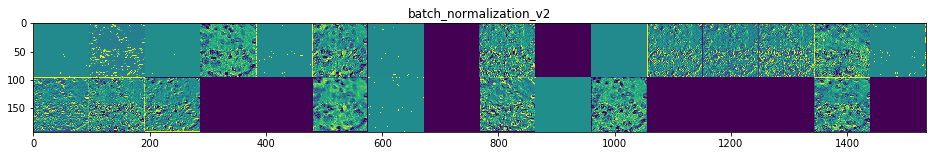

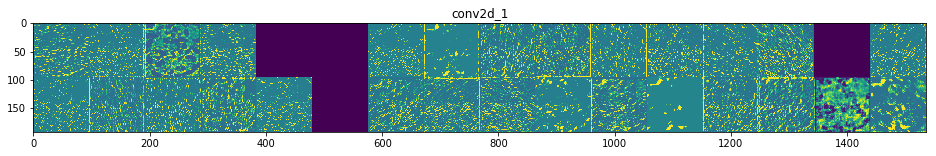

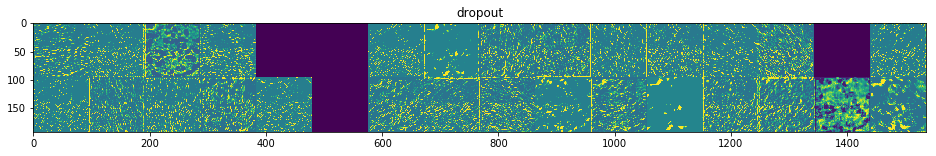

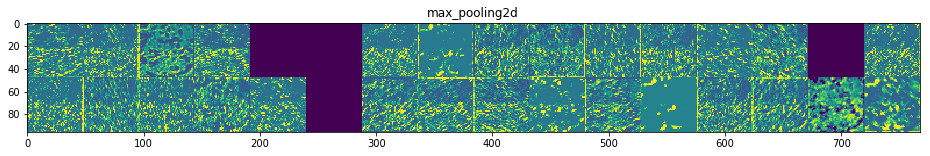

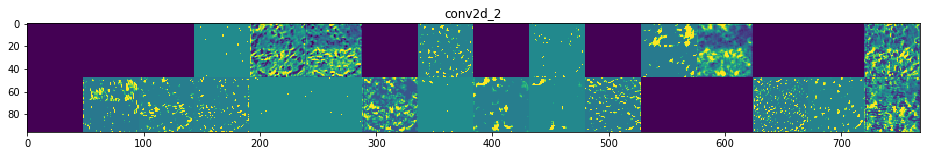

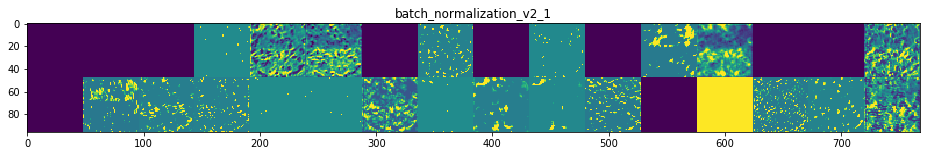

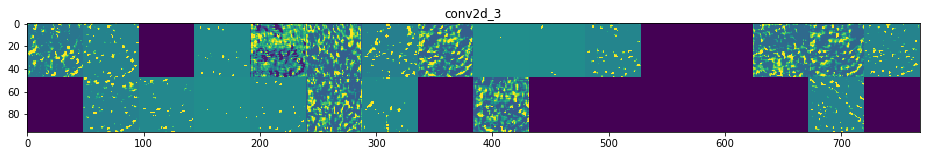

In [18]:
# Visualize the first 10 layers
layer_names = []
for layer in model.layers[:8]:
    layer_names.append(layer.name)

images_per_row = 16

# Now let's display our feature maps
for layer_name, layer_activation in zip(layer_names, activations):
    # This is the number of features in the feature map
    n_features = layer_activation.shape[-1]

    # The feature map has shape (1, size, size, n_features)
    size = layer_activation.shape[1]

    # We will tile the activation channels in this matrix
    n_cols = n_features // images_per_row
    display_grid = np.zeros((size * n_cols, images_per_row * size))

    # We'll tile each filter into this big horizontal grid
    for col in range(n_cols):
        for row in range(images_per_row):
            channel_image = layer_activation[0,
                                             :, :,
                                             col * images_per_row + row]
            # Post-process the feature to make it visually palatable
            channel_image -= channel_image.mean()
            channel_image /= channel_image.std()
            channel_image *= 64
            channel_image += 128
            channel_image = np.clip(channel_image, 0, 255).astype('uint8')
            display_grid[col * size : (col + 1) * size,
                         row * size : (row + 1) * size] = channel_image

    # Display the grid
    scale = 1. / size
    plt.figure(figsize=(scale * display_grid.shape[1],
                        scale * display_grid.shape[0]))
    plt.title(layer_name)
    plt.grid(False)
    plt.imshow(display_grid, aspect='auto', cmap='viridis')
    
plt.show()

#### Transfer learning - VGG19

In [19]:
# Prepare train and test data for the required format
x_train2 = x_train.astype("float64", order='K', casting='unsafe', subok=True, copy=True)
y_train2 = np.array(y_train)
x_test2 = x_test.astype("float64", order='K', casting='unsafe', subok=True, copy=True)
y_test2 = np.array(y_test)

In [20]:
# Load VGG19 as the conv_base
conv_base_vgg19 = VGG19(weights='imagenet',
                  include_top=False,
                  input_shape=(96, 96, 3))
#conv_base_vgg19.summary()

In [21]:
# Build model based on VGG19
model2 = models.Sequential()
model2.add(conv_base_vgg19)
model2.add(layers.Flatten())
model2.add(layers.Dense(256,activation = "relu"))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(64,activation = "relu"))
model2.add(layers.Dropout(0.1))
model2.add(layers.Dense(1, activation = 'sigmoid'))
model2.summary()

Model: "sequential_1"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
vgg19 (Model)                (None, 3, 3, 512)         20024384  
_________________________________________________________________
flatten_1 (Flatten)          (None, 4608)              0         
_________________________________________________________________
dense_3 (Dense)              (None, 256)               1179904   
_________________________________________________________________
dropout_6 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_4 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_7 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_5 (Dense)              (None, 1)                

In [22]:
# Train Model
conv_base_vgg19.trainable = False
model2.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history2 = model2.fit(
                x=x_train2,
                y = y_train2,
                epochs=10,
                validation_split=0.3)

Train on 16800 samples, validate on 7200 samples
Epoch 1/10
16800/16800 [==============================] - 15s 907us/sample - loss: 0.6690 - accuracy: 0.7882 - val_loss: 0.3929 - val_accuracy: 0.8263
Epoch 2/10
16800/16800 [==============================] - 15s 866us/sample - loss: 0.3806 - accuracy: 0.8345 - val_loss: 0.3741 - val_accuracy: 0.8403
Epoch 3/10
16800/16800 [==============================] - 15s 865us/sample - loss: 0.3398 - accuracy: 0.8544 - val_loss: 0.3713 - val_accuracy: 0.8410
Epoch 4/10
16800/16800 [==============================] - 15s 865us/sample - loss: 0.3068 - accuracy: 0.8679 - val_loss: 0.3724 - val_accuracy: 0.8396
Epoch 5/10
16800/16800 [==============================] - 15s 866us/sample - loss: 0.2832 - accuracy: 0.8781 - val_loss: 0.4085 - val_accuracy: 0.8340
Epoch 6/10
16800/16800 [==============================] - 15s 866us/sample - loss: 0.2641 - accuracy: 0.8863 - val_loss: 0.4185 - val_accuracy: 0.8485
Epoch 7/10
16800/16800 [=====================

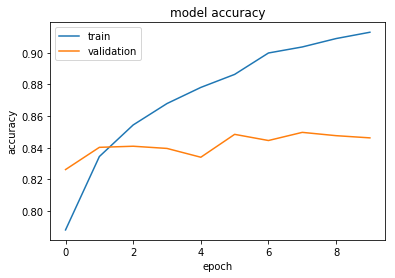

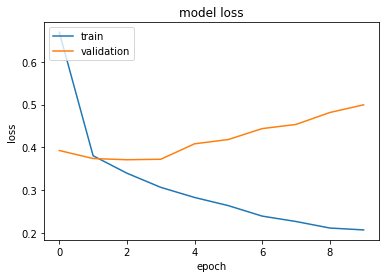

In [23]:
# Visualize training results
plt.plot(history2.history['accuracy'])
plt.plot(history2.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history2.history['loss'])
plt.plot(history2.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [24]:
# Check testing accuracy
results2 = model2.evaluate(x_test2, y_test2)
print('The testing accuracy is: ' + str(results2[1]))

6000/6000 [==============================] - 4s 606us/sample - loss: 0.4577 - accuracy: 0.8498
The testing accuracy is: 0.8498333


#### Transfer learning - ResNet50

In [25]:
# Load ResNet50 as the conv_base
conv_base_ResNet50 = ResNet50(weights='imagenet',
                  include_top=False,
                  input_shape=(96, 96, 3))
#conv_base_ResNet50.summary()

/gpfs/data/data2040/tf2gpu2/lib/python3.6/site-packages/keras_applications/resnet50.py:265: UserWarning: The output shape of `ResNet50(include_top=False)` has been changed since Keras 2.2.0.
  warnings.warn('The output shape of `ResNet50(include_top=False)` '


In [26]:
# Build model based on ResNet50
model3 = models.Sequential()
model3.add(conv_base_ResNet50)
model3.add(layers.Flatten())
model3.add(layers.Dense(256,activation = "relu"))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(64,activation = "relu"))
model3.add(layers.Dropout(0.1))
model3.add(layers.Dense(1, activation = 'sigmoid'))

In [36]:
model3.summary()

Model: "sequential_2"
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
resnet50 (Model)             (None, 3, 3, 2048)        23587712  
_________________________________________________________________
flatten_2 (Flatten)          (None, 18432)             0         
_________________________________________________________________
dense_6 (Dense)              (None, 256)               4718848   
_________________________________________________________________
dropout_8 (Dropout)          (None, 256)               0         
_________________________________________________________________
dense_7 (Dense)              (None, 64)                16448     
_________________________________________________________________
dropout_9 (Dropout)          (None, 64)                0         
_________________________________________________________________
dense_8 (Dense)              (None, 1)                

In [27]:
# Train Model
conv_base_ResNet50.trainable = False
model3.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

history3 = model3.fit(
                x=x_train2,
                y = y_train2,
                epochs=10,
                validation_split=0.3)

Train on 16800 samples, validate on 7200 samples
Epoch 1/10
16800/16800 [==============================] - 18s 1ms/sample - loss: 0.4881 - accuracy: 0.8002 - val_loss: 0.3556 - val_accuracy: 0.8529
Epoch 2/10
16800/16800 [==============================] - 15s 876us/sample - loss: 0.3456 - accuracy: 0.8545 - val_loss: 0.3380 - val_accuracy: 0.8633
Epoch 3/10
16800/16800 [==============================] - 15s 878us/sample - loss: 0.2943 - accuracy: 0.8794 - val_loss: 0.3515 - val_accuracy: 0.8679
Epoch 4/10
16800/16800 [==============================] - 15s 878us/sample - loss: 0.2456 - accuracy: 0.8997 - val_loss: 0.3584 - val_accuracy: 0.8618
Epoch 5/10
16800/16800 [==============================] - 15s 887us/sample - loss: 0.2198 - accuracy: 0.9108 - val_loss: 0.3716 - val_accuracy: 0.8665
Epoch 6/10
16800/16800 [==============================] - 15s 878us/sample - loss: 0.1853 - accuracy: 0.9242 - val_loss: 0.4244 - val_accuracy: 0.8647
Epoch 7/10
16800/16800 [=======================

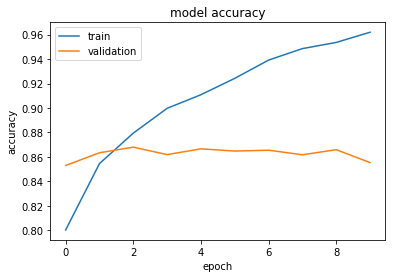

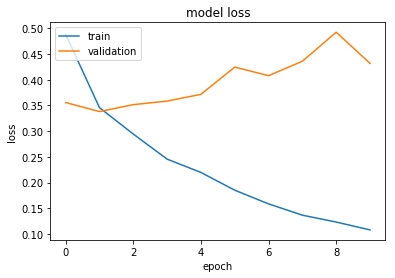

In [28]:
# Visualize training results
plt.plot(history3.history['accuracy'])
plt.plot(history3.history['val_accuracy'])
plt.title('model accuracy')
plt.ylabel('accuracy')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()
plt.plot(history3.history['loss'])
plt.plot(history3.history['val_loss'])
plt.title('model loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.show()

In [29]:
# Check testing accuracy
results3 = model3.evaluate(x_test2, y_test2)
print('The testing accuracy is: ' + str(results3[1]))

6000/6000 [==============================] - 4s 590us/sample - loss: 0.3932 - accuracy: 0.8637
The testing accuracy is: 0.86366665
